# Notebook 4 - Soil Constraints

<hr>
After applying the agro-climatic constraints (NB3) onto the maximum attainable yield, we will now apply the soil constraints.

Prepared by Geoinformatics Center, AIT
<hr>

### Google drive connection
In this step, we will connect to Google Drive service and mount the drive where we will start our PyAEZ project

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

Then, installing any additional python packages that required to run PyAEZ.
If working on your own PC/machine, these additional installation will vary depending on what is already installed in your Python library. 

In [ ]:
# 'Installing neccessary packages'
# !pip install gdal
# # !pip install pyaez==2.0.0


Now, we will import the specific Python packages we need for PyAEZ.

In [2]:
'''import supporting libraries'''
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
try:
    from osgeo import gdal
except:
    import gdal
import sys


Setting the working directory -- where our PyAEZ project is located.

In [3]:
'Set the working directory'
# Replace with path to your PyAEZv2 folder
work_dir = '/Volumes/GoogleDrive/My Drive/PyAEZv2_FINAL_DRAFT'
os.chdir(work_dir)
sys.path.append('./pyaez/')
!pwd


/Volumes/GoogleDrive/My Drive/PyAEZv2_FINAL_DRAFT


<hr>

## MODULE 4: SOIL CONSTRAINTS
Now, we will start executing the routines in Module 4


First, we initiate Module 4 Class instance by invoking the following commands:

In [4]:
'''importing library'''
import SoilConstraints
soil_constraints = SoilConstraints.SoilConstraints()

import UtilitiesCalc
obj_utilities = UtilitiesCalc.UtilitiesCalc()

In [5]:
# Load the geographical data/rasters
mask_path = './data_input/LAO_Admin.tif'
mask = gdal.Open(mask_path).ReadAsArray()

In [6]:
soil.max()

NameError: name 'soil' is not defined

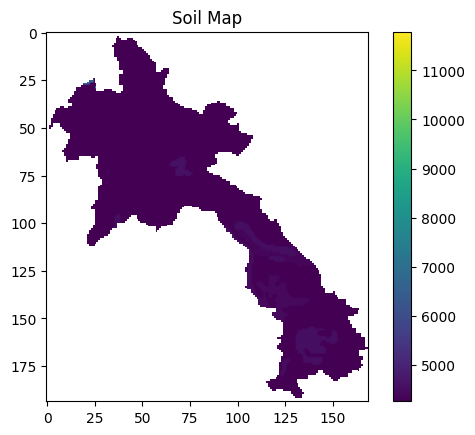

In [7]:
'''reading data'''
# For training, we have our yield data ready. In case you have to upload it
# use this gdal.Open function. We have our climate_adjusted yield ready to use.

# yield_irr = gdal.Open(r'./data_output/NB2/LAO_CropSuitability_irr.tif').ReadAsArray()
# yield_rain = gdal.Open(r'./data_output/NB2/LAO_CropSuitability_rain.tif').ReadAsArray()
clim_adj_yield_irr = gdal.Open(r'./data_output/NB3/LAO_clim_adj_yield_map_irr.tif').ReadAsArray()
clim_adj_yield_rain = gdal.Open(r'./data_output/NB3/LAO_clim_adj_yield_map_rain.tif').ReadAsArray()
clim_adj_yield_irr_class = gdal.Open(
    r'./data_output/NB3/LAO_clim_adj_yield_map_irr_class.tif').ReadAsArray()
clim_adj_yield_rain_class = gdal.Open(
    r'./data_output/NB3/LAO_clim_adj_yield_map_rain_class.tif').ReadAsArray()
# Soil map from Harmonized World Soil Database
soil = gdal.Open(r'./data_input/LAO_Soil.tif').ReadAsArray()
soil = np.ma.masked_where(mask==0,soil)

plt.imshow(soil)
plt.colorbar()
plt.title('Soil Map')
plt.show()


### Calculate soil qualities
The combination of 7 soil qualities (SQ), which are based on the soil characteristics of each soil unit, and the input level gives us a single yield reduction factor – Soil Rating, which will be applied to the remaining yield. For more details on this calculation, please refer to GAEZv4 documentation (Fischer et al., 2021).
- SQ1: Nutrient availability
- SQ2: Nutrient retention capacity
- SQ3: Rooting conditions
- SQ4: Oxygen availability to roots
- SQ5: Excess salts
- SQ6: Toxicity
- SQ7: Workability (constraining field management)

In [8]:
# For the file path of topsoil and subsoil properties, go to the source code of SoilConstraints and change the file paths
'''calculate soil qualities and ratings and applying soil constraints - Rain-fed'''
# Current implementation of creating two csv files is to look into the metadata of HWSD database and copy the required parameters
# into the files. Depending how many soil types in your area of interest, the list may either be short or long


soil_constraints.calculateSoilQualities('R', topsoil_path='./data_input/soil_characteristics_topsoil.csv',
                                        subsoil_path='./data_input/soil_characteristics_subsoil.csv')  # I: Irrigated, R: Rain-fed

# L: Low, I: Intermediate , H: High input
soil_constraints.calculateSoilRatings('I')

# applying soil and climate adjusted estimated yield rainfed condition
clim_soil_adj_yield_rain = soil_constraints.applySoilConstraints(
    soil, clim_adj_yield_rain)

clim_soil_adj_yield_irr = soil_constraints.applySoilConstraints(
    soil, clim_adj_yield_irr)


### Classify the final yield map (after Clim.+Soil Reduction)
Yield Classification
1.   not suitable (yields between 0% and 20%)
2.   marginally suitable (yields between 20% and 40%)
3.   moderately suitable (yields between 40% and 60%)
4. suitable (yields between 60% and 80%)
5. very suitable (yields are equivalent to 80% or more of the overall maximum yield)
    

In [9]:
# Classify the output yield after clim+soil constraints
clim_soil_adj_yield_irr_class = obj_utilities.classifyFinalYield(
    clim_soil_adj_yield_irr)
clim_soil_adj_yield_rain_class = obj_utilities.classifyFinalYield(
    clim_soil_adj_yield_rain)

In [10]:
# Masking out the results
clim_adj_yield_rain = np.ma.masked_where(mask==0,clim_adj_yield_rain)
clim_adj_yield_rain_class = np.ma.masked_where(mask==0,clim_adj_yield_rain_class)

clim_adj_yield_irr = np.ma.masked_where(mask==0,clim_adj_yield_irr)
clim_adj_yield_irr_class = np.ma.masked_where(mask==0,clim_adj_yield_irr_class)

clim_soil_adj_yield_rain = np.ma.masked_where(mask==0,clim_soil_adj_yield_rain)
clim_soil_adj_yield_rain_class = np.ma.masked_where(mask==0,clim_soil_adj_yield_rain_class)

clim_soil_adj_yield_irr = np.ma.masked_where(mask==0,clim_soil_adj_yield_irr)
clim_soil_adj_yield_irr_class = np.ma.masked_where(mask==0,clim_soil_adj_yield_irr_class)

### Visualisation and saving the results

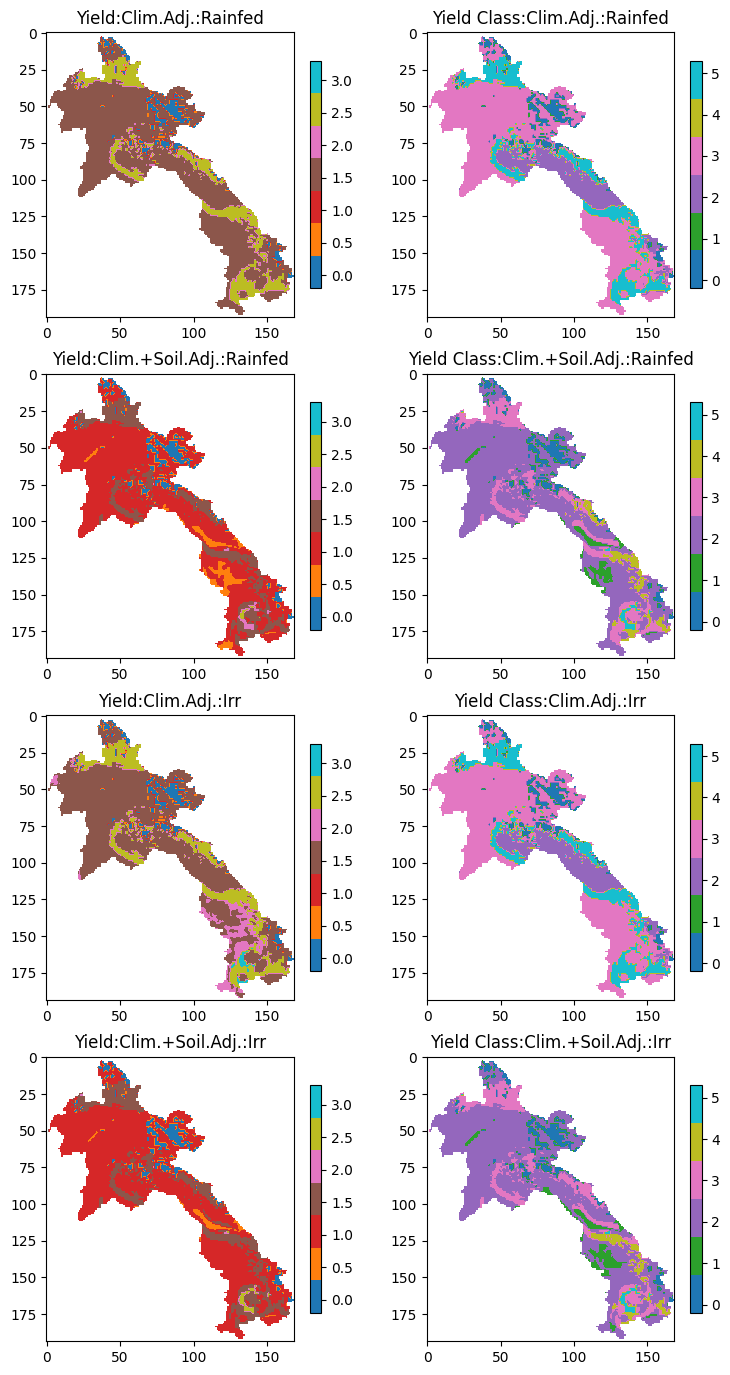

In [11]:
'''visualisng the output from Module 4 Soil Constraints'''
plt.figure(figsize=(9,17))
#--------------------
# Plot the Yield - climate adjusted (Rainfed)
plt.subplot(4,2,1)
plt.imshow(clim_adj_yield_rain, 
           cmap=plt.get_cmap('tab10', 7), 
           vmin=-0.2, vmax=3.3)
plt.title('Yield:Clim.Adj.:Rainfed')
plt.colorbar(shrink=0.8)
#--------------------
# Plot the Yield Class - climate adjusted (Rainfed)
plt.subplot(4,2,2)
plt.imshow(clim_adj_yield_rain_class, cmap=plt.get_cmap('tab10',6),vmin=-0.2,vmax=5.3)
plt.title('Yield Class:Clim.Adj.:Rainfed')
plt.colorbar(shrink=0.8)
#--------------------
# Plot the Yield - climate+soil adjusted (Rainfed)
plt.subplot(4,2,3)
plt.imshow(clim_soil_adj_yield_rain,
           cmap=plt.get_cmap('tab10', 7),
           vmin=-0.2, vmax=3.3)
plt.title('Yield:Clim.+Soil.Adj.:Rainfed')
plt.colorbar(shrink=0.8)
#--------------------
# Plot the Yield Class - climate+soil adjusted (Rainfed)
plt.subplot(4,2,4)
plt.imshow(clim_soil_adj_yield_rain_class, 
           cmap=plt.get_cmap('tab10', 6), 
           vmin=-0.2, vmax=5.3)
plt.title('Yield Class:Clim.+Soil.Adj.:Rainfed')
plt.colorbar(shrink=0.8)
#--------------------
# Plot the Yield - climate adjusted (Irrigated)
plt.subplot(4, 2, 5)
plt.imshow(clim_adj_yield_irr,
           cmap=plt.get_cmap('tab10', 7),
           vmin=-0.2, vmax=3.3)
plt.title('Yield:Clim.Adj.:Irr')
plt.colorbar(shrink=0.8)
# --------------------
# Plot the Yield Class - climate adjusted (Irrigated)
plt.subplot(4, 2, 6)
plt.imshow(clim_adj_yield_irr_class, 
           cmap=plt.get_cmap('tab10', 6), 
           vmin=-0.2, vmax=5.3)
plt.title('Yield Class:Clim.Adj.:Irr')
plt.colorbar(shrink=0.8)
# --------------------
# Plot the Yield - climate+soil adjusted (Irrigated)
plt.subplot(4, 2, 7)
plt.imshow(clim_soil_adj_yield_irr,
           cmap=plt.get_cmap('tab10', 7),
           vmin=-0.2, vmax=3.3)
plt.title('Yield:Clim.+Soil.Adj.:Irr')
plt.colorbar(shrink=0.8)
# --------------------
# Plot the Yield Class - climate+soil adjusted (Irrigated)
plt.subplot(4, 2, 8)
plt.imshow(clim_soil_adj_yield_irr_class,
           cmap=plt.get_cmap('tab10', 6), 
           vmin=-0.2, vmax=5.3)
plt.title('Yield Class:Clim.+Soil.Adj.:Irr')
plt.colorbar(shrink=0.8)
# --------------------
plt.savefig("./data_output/NB4/LAO_ClimSoilConstraints.png",bbox_inches='tight',dpi=300)
plt.show()

In [12]:
obj_utilities.saveRaster(mask_path,
                    r'./data_output/NB4/LAO_clim_soil_adj_yield_rain.tif', clim_soil_adj_yield_rain)
obj_utilities.saveRaster(mask_path,
                    r'./data_output/NB4/LAO_clim_soil_adj_yield_rain_class.tif', clim_soil_adj_yield_rain_class)

obj_utilities.saveRaster(mask_path,
                    r'./data_output/NB4/LAO_clim_soil_adj_yield_irr.tif', clim_soil_adj_yield_irr)
obj_utilities.saveRaster(mask_path,
                    r'./data_output/NB4/LAO_clim_soil_adj_yield_irr_class.tif', clim_soil_adj_yield_irr_class)


<hr>

### END OF MODULE 4: SOIL CONSTRAINTS

<hr>